## Decoupling
Given a general multivariable system with transfer function matrix $G_p$, a decoupler attempts to combine with the system to form a diagonal whole.

<img src="../../assets/decoupling.png">

In [1]:
import sympy
sympy.init_printing()

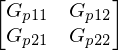

In [2]:
G_p11, G_p12, G_p21, G_p22 = sympy.symbols('G_p11, G_p12, G_p21, G_p22')
G_p = sympy.Matrix([[G_p11, G_p12],[G_p21, G_p22]])
G_p

### 1. Inverse-based
Wouldn't it be nice if the system didn't have interaction? In other words, we could choose $T$ such that we have this system with the same diagonal elements as the original system but zeros in the off diagonals.

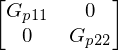

In [3]:
G_s = sympy.Matrix([[G_p11, 0],[0, G_p22]])
G_s

Recalling that the combination of $T$ and $G_p$ in series is $T G_p$, we can solve for the decoupler directly

$$ G_P T = G_s \therefore T = G_P^{-1} G_s $$

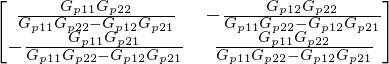

In [4]:
T = G_p.inverse_ADJ()*G_s
T

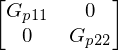

In [5]:
G_pT = G_p*T #Test if the decoupler actually works...
sympy.simplify(G_pT)

This is a very desirable situation, but unfortunately we may encounter problems with this controller not being physically realisable. It is also clearly quite a bit more involved than any of the individual transfer functions so it may be costly to develop even if it is realisable.

### 2. Zero off-diagonals
A more common strategy is to solve directly for the off-diagonal elements of set equal to zero.

So we just want 

$$G_P T = \begin{bmatrix}d_1&0\\0&d_2\end{bmatrix}$$

In [6]:
T21, T12 = sympy.symbols('T21, T12')
T = sympy.Matrix([[1, T12], 
                  [T21, 1]])

wantdiagonal = T*G_p

sol = sympy.solve([wantdiagonal[0,1], wantdiagonal[1, 0]], [T21, T12])

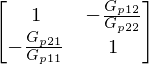

In [7]:
T.subs(sol)

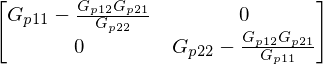

In [8]:
T.subs(sol)*G_p

### 3. Adjugate method
The adjugate (previously calld the adjoint) of a matrix will also diagonalise a system

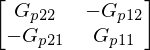

In [9]:
D = G_p.adjugate()
D

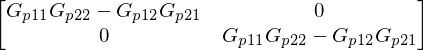

In [10]:
G_p*D